<a href="https://colab.research.google.com/github/MarioAvolio/Amazon-Fine-Foods-reviews-Transformers-Text-Classification/blob/main/Text_Classification_Amazon_Fine_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credits


**Mario Avolio: 880995 - https://marioavolio.netlify.app/**

Credits: 
- https://www.oreilly.com/library/view/practical-natural-language/9781492054047/

Dataset:
- https://snap.stanford.edu/data/web-FineFoods.html



In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt # plotting
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Constants and Methods

In [5]:
PATH_PROJ = "/content/drive/MyDrive/data-proj/"
# if not os.path.exists(PATH_PROJ):
#   PATH_PROJ = "/content/drive/MyDrive/shared/data-proj/"

PATH_DATASET = PATH_PROJ+"preprocessed.csv"

# Data 

In [6]:
df = pd.read_csv(PATH_DATASET)

# Model - Text Classification

The challenge of text classification is to “learn” this categorization from a
collection of examples for each of these categories and predict the categories for new,
unseen products and new customer reviews.


## A Simple Classifier Without the Text Classification Pipeline: lexicon-based sentiment analysis

The **AFINN** lexicon is a list of **English terms** manually rated for valence with an integer between -5 (negative) and +5 (positive) by Finn Årup Nielsen between 2009 and 2011.

https://arxiv.org/pdf/1103.2903.pdf


In [ ]:
!pip install afinn
from afinn import Afinn
afinn = Afinn(emoticons=True)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=4d6885a8bef983fc5b4140dd209bad6c0d4398ebb24399c9d4f3a4b65c85b0d5
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
def apply_afinn(row):
  score = 0
  for word in row:
    score += afinn.score(word)

  return score

In [ ]:
df['afinn'] = df["text"].apply(apply_afinn) #new attribute/column 
#check out how apply works

df[['score', 'afinn', 'text']].head(10)

,score,afinn,text
0,5.0,9.0,"[b, ', i, have, bought, sever, of, the, vital,..."
1,1.0,-2.0,"[b'product, arriv, label, as, jumbo, salt, pea..."
2,4.0,5.0,"[b'thi, is, a, confect, that, ha, been, around..."
3,2.0,3.0,"[b'if, you, are, look, for, the, secret, ingre..."
4,5.0,6.0,"[b'great, taffi, at, a, great, price, ., there..."
5,4.0,2.0,"[b, ', i, got, a, wild, hair, for, taffi, and,..."
6,5.0,6.0,"[b, '', thi, saltwat, taffi, had, great, flavo..."
7,5.0,5.0,"[b'thi, taffi, is, so, good, ., it, is, veri, ..."
8,5.0,3.0,"[b, '', right, now, i, 'm, mostli, just, sprou..."
9,5.0,6.0,"[b'thi, is, a, veri, healthi, dog, food, ., go..."


In [ ]:
df.iloc[0]

text                [b, ', i, have, bought, sever, of, the, vital,...
score                                                             5.0
Words Per Review                                                   48
afinn                                                             9.0
Name: 0, dtype: object

In [ ]:
df.afinn.value_counts() # df. column_name .value_counts()

 3.0     3211
 5.0     3062
 6.0     2925
 0.0     2583
 2.0     2508
         ... 
 65.0       1
 48.0       1
 47.0       1
 52.0       1
-21.0       1
Name: afinn, Length: 80, dtype: int64

In [ ]:
#let's compute the range of afinn scores in this dataset

In [ ]:
abs(min(df.afinn.value_counts().index.astype(int)) - max(df.afinn.value_counts().index.astype(int)))

104

In [ ]:
#let's visualize the histogram of frequencies

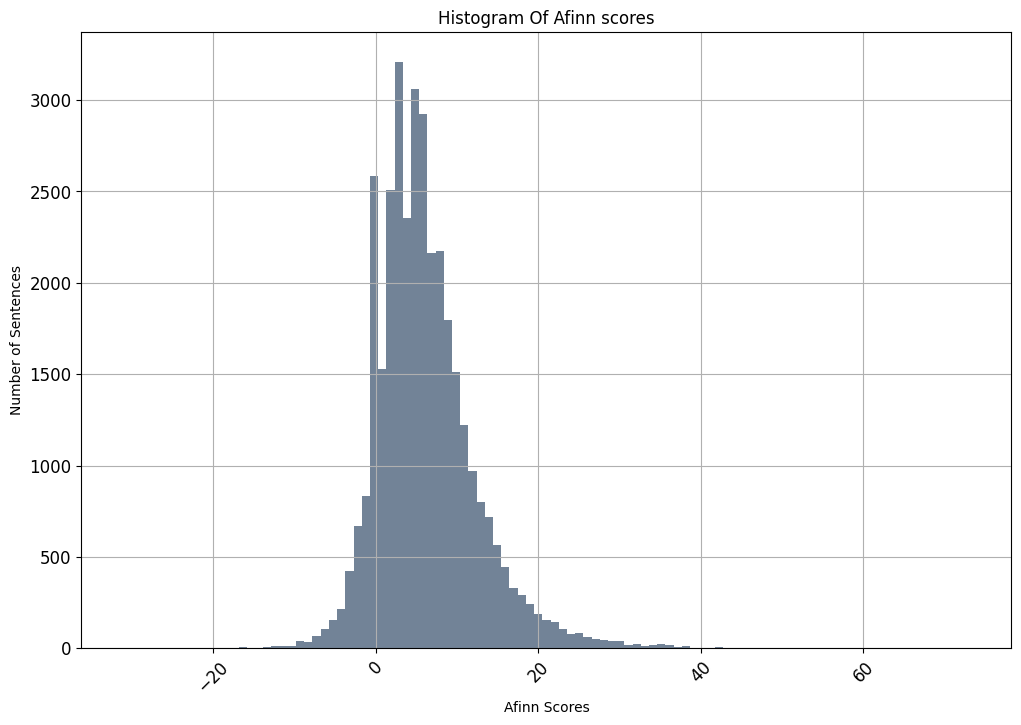

In [ ]:
df.afinn.plot(kind='hist', #takes the column name as input
        alpha=0.7,
        bins = abs(min(df.afinn.value_counts().index.astype(int)) - max(df.afinn.value_counts().index.astype(int)))-1,
        title='Histogram Of Afinn scores',
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=12, 
        color=['#364F6B'])
plt.xlabel('Afinn Scores')
plt.ylabel("Number of Sentences");

In [ ]:
#let's check the distribution of sentiment values

In [ ]:
df.score.value_counts() #df. column_name .value_counts()

5.0    22017
4.0     5071
1.0     3218
3.0     2860
2.0     2006
Name: score, dtype: int64

In [ ]:
confusion = pd.crosstab(df.score, df.afinn) #confusion matrix
confusion

afinn,-31.0,-21.0,-19.0,-18.0,-17.0,-16.0,-15.0,-14.0,-13.0,-12.0,...,51.0,52.0,53.0,56.0,57.0,58.0,65.0,67.0,70.0,73.0
score,,,,,,,,,,,,,,,,,,,,,
1.0,1,1,3,1,3,8,1,2,2,11,...,0,0,0,0,0,0,0,0,0,0
2.0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4.0,0,0,0,0,0,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5.0,0,0,0,0,0,0,0,1,3,1,...,3,0,2,0,1,1,1,1,1,1


compute a 3-class confusion matrix 
- positive (+1) 
- neutral (0) 
- negative (-1)

In [ ]:
# Compute 3-class confusion matrix
confusion = pd.crosstab(np.sign(df.score - 3), 
                        np.sign(df.afinn))
confusion

afinn,-1.0,0.0,1.0
score,,,
-1.0,1290,660,3274
0.0,277,300,2283
1.0,1044,1623,24421


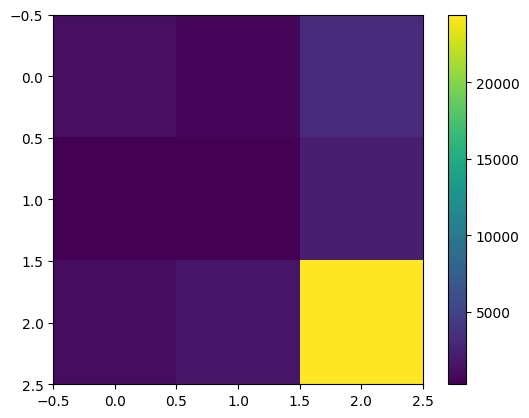

In [ ]:
shw = plt.imshow(confusion)
bar = plt.colorbar(shw)

In [ ]:
accuracy_3_class = np.sum(np.diag(confusion)) / np.sum(confusion.values)
accuracy_3_class

0.7395371318093938

 we compute a 2-class confusion matrix excluding neutral sentiments

In [ ]:
# Compute 2-class confusion matrix
confusion_2_class = confusion.iloc[[0, 2], [0, 2]] #beware! 
confusion_2_class

afinn,-1.0,1.0
score,,
-1.0,1290,3274
1.0,1044,24421


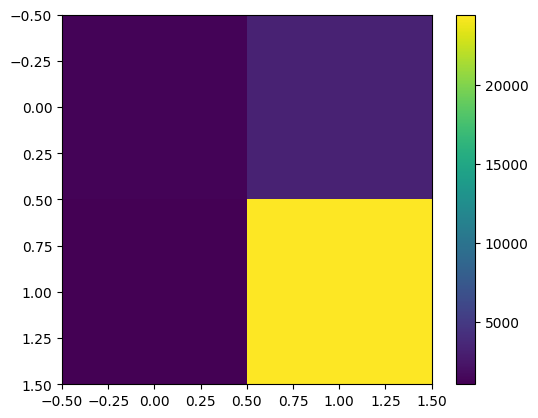

In [ ]:
shw = plt.imshow(confusion_2_class)
bar = plt.colorbar(shw)

How much is the accuracy?

In [ ]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.8562056678544074

Use as **baseline** the most frequent class: it gives better results

In [ ]:
accuracy_2_class_baseline = confusion_2_class.sum().max() / np.sum(confusion_2_class.values)
accuracy_2_class_baseline

0.9222751340370975

### Custom lexicon


In [ ]:
!git clone https://github.com/mhbashari/NRC-Persian-Lexicon
!mv "/content/NRC-Persian-Lexicon/NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx" "/content/NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx"

Cloning into 'NRC-Persian-Lexicon'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 36 (delta 17), reused 32 (delta 15), pack-reused 0
Unpacking objects: 100% (36/36), 6.52 MiB | 7.03 MiB/s, done.


In [ ]:
import pandas as pd
# import the lexicon
lexicon_df = pd.read_excel("NRC-Emotion-Lexicon-v0.92-InManyLanguages-web.xlsx", engine="openpyxl")

#many languages
#8 emotion types
#https://github.com/sebastianruder/emotion_proposition_store/tree/master/NRC-Emotion-Lexicon-v0.92


#The NRC emotion lexicon is a list of words and their associations with
#eight emotions (anger, fear, anticipation, trust, surprise, sadness,
#joy, and disgust) and two sentiments (negative and positive). The
#annotations were manually done through Amazon's Mechanical Turk. Refer
#to publications below for more details: http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm 


lexicon_df.head(10)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,English Word,Arabic Translation (Google Translate),Basque Translation (Google Translate),Bengali Translation (Google Translate),Catalan Translation (Google Translate),Chinese (simplified) Translation (Google Translate),Chinese (traditional) Translation (Google Translate),Danish Translation (Google Translate),Dutch Translation (Google Translate),Esperanto Translation (Google Translate),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,الى الوراء,aback,পশ্চাতে,darrere,吓了一跳,嚇了一跳,overrasket,verrast,surprizita,...,0,0,0,0,0,0,0,0,0,0
1,abacus,طبلية تاج,abako,গণনা-যন্ত্রবিশেষ,àbac,算盘,算盤,abacus,abacus,abako,...,0,0,0,0,0,0,0,0,0,1
2,abandon,تخلى,alde batera utzi,বর্জিত করা,abandonar,放弃,放棄,opgive,verlaten,forlasos,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,مهجور,abandonatu,পরিত্যক্ত,abandonat,弃,棄,forladte,verlaten,forlasita,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,هجر,abandono,বিসর্জন,abandonament,放弃,放棄,opgivelse,verlatenheid,forlasas,...,0,1,1,0,0,1,0,1,1,0
5,abate,انحسر,abate,প্রকোপ হ্রাস করা,disminuir,杀,殺,aftage,verminderen,Abate,...,0,0,0,0,0,0,0,0,0,0
6,abatement,انحسار,murrizteko,উপশম,disminució,减排,減排,nedskæring,vermindering,abatement,...,0,0,0,0,0,0,0,0,0,0
7,abba,أبا,abba,Abba,abba,ABBA,ABBA,abba,abba,ABBA,...,1,0,0,0,0,0,0,0,0,0
8,abbot,رئيس الدير,abade,মঠাধ্যক্ষ,abat,方丈,方丈,abbed,abt,abato,...,0,0,0,0,0,0,0,0,0,1
9,abbreviate,اختصر,laburtu,খাট করা,abreujar,简略,簡略,forkorte,afkorten,mallongigi,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# create a dict mapping word to value
lexicon = {}

#https://www.w3schools.com/python/ref_func_zip.asp

for word, pos, neg in zip(lexicon_df["English Word"], lexicon_df["Positive"], lexicon_df["Negative"]):
  if pos:
    value = 1
  elif neg:
    value = -1 #i do not consider 0's 
  else:
    continue
  lexicon[str(word).lower()] = value #lower case

In [ ]:
# this custom function will return the sentiment associated to a sentence via the sum of single words
def myscore(sentence):
  sentiment = 0
  for word in sentence: 
    sentiment += lexicon.get(word.lower()) if lexicon.get(word.lower()) is not None else 0 #+= operator
  return sentiment

In [ ]:
# apply myscore function
df['myscore'] = df["text"].apply(myscore)
df[['score', 'afinn','myscore', 'text']].tail(30)

,score,afinn,myscore,text
35142,5.0,4.0,0,"[b, '', hi, buy, thi, oil, for, all, your, sti..."
35143,5.0,4.0,1,"[b'thi, peanut, oil, is, clear, odorless, high..."
35144,3.0,8.0,2,"[b, ', i, am, give, it, a, 3, star, review, be..."
35145,5.0,3.0,1,"[b, ', i, use, these, to, make, my, own, raw, ..."
35146,5.0,10.0,7,"[b, '', have, live, in, spain, for, almost, si..."
35147,3.0,18.0,10,"[b, '', these, cracker, are, made, by, back, t..."
35148,5.0,7.0,4,"[b'mi, son, is, absout, addict, to, these, thi..."
35149,5.0,12.0,7,"[b, '', my, 14, month, daughter, love, these, ..."
35150,5.0,7.0,2,"[b, '', out, of, all, the, snack, out, there, ..."
35151,5.0,8.0,2,"[b'bought, thi, for, my, great-nephew, and, he..."


In [ ]:
confusion = pd.crosstab(np.sign(df.score - 3), np.sign(df.myscore))
confusion_2_class = confusion.iloc[[0, 2], [0, 2]]
confusion_2_class

myscore,-1,1
score,,
-1.0,1279,2946
1.0,2171,20931


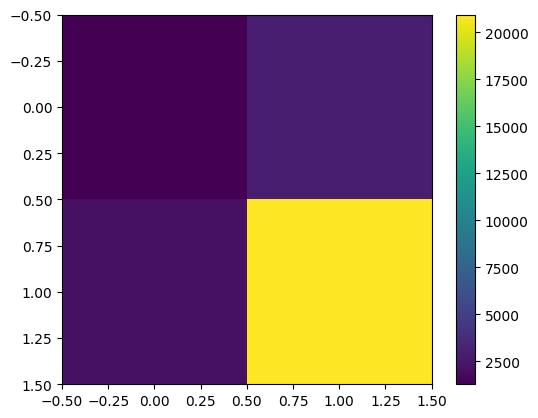

In [ ]:
shw = plt.imshow(confusion_2_class)
bar = plt.colorbar(shw)

In [ ]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.8127492955684854

lower than the baseline (0.9219343235862253)! BEWARE

what about the confusion matrix between the afinn score and the new score?

In [ ]:
confusion = pd.crosstab(np.sign(df.afinn - 3), np.sign(df.myscore))
confusion_2_class = confusion.iloc[[0, 2], [0, 2]]
confusion_2_class

myscore,-1,1
afinn,,
-1.0,2209,4417
1.0,1321,19182


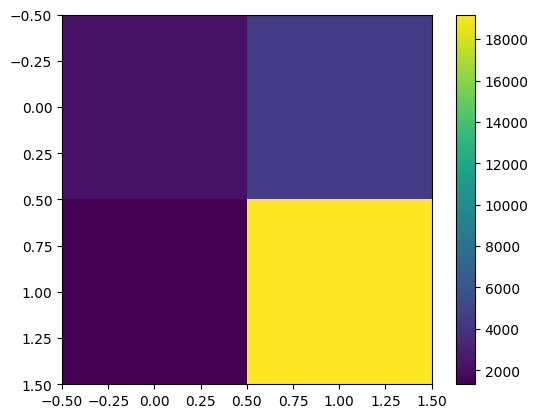

In [ ]:
shw = plt.imshow(confusion_2_class)
bar = plt.colorbar(shw)

In [ ]:
accuracy_2_class = np.sum(np.diag(confusion_2_class)) / np.sum(confusion_2_class.values)
accuracy_2_class

0.7884920196100115

## Feature Engeneering and ML classifiers


In [ ]:
from sklearn.model_selection import train_test_split
#Step 1: train-test split
X = df.text
#the column text contains textual data to extract features from.
y = df.score
#this is the column we are learning to predict.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
#split X and y into training and testing sets. By default, it splits 75% training and 25% test. random_state=1 for reproducibility.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Step 2-3: Pre-process and Vectorize train and test data
vect = CountVectorizer(stop_words=None, lowercase=True, max_features=5000)
#clean is a function we defined for pre-processing, seen in the notebook.
X_train_dtm = vect.fit_transform(X_train.apply(lambda x: " ".join(x)))
X_test_dtm = vect.transform(X_test.apply(lambda x: " ".join(x)))
print(X_train_dtm.shape, X_test_dtm.shape)

(26379, 5000) (8793, 5000)


### Balancig Data

https://imbalanced-learn.org/stable/

In [ ]:
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


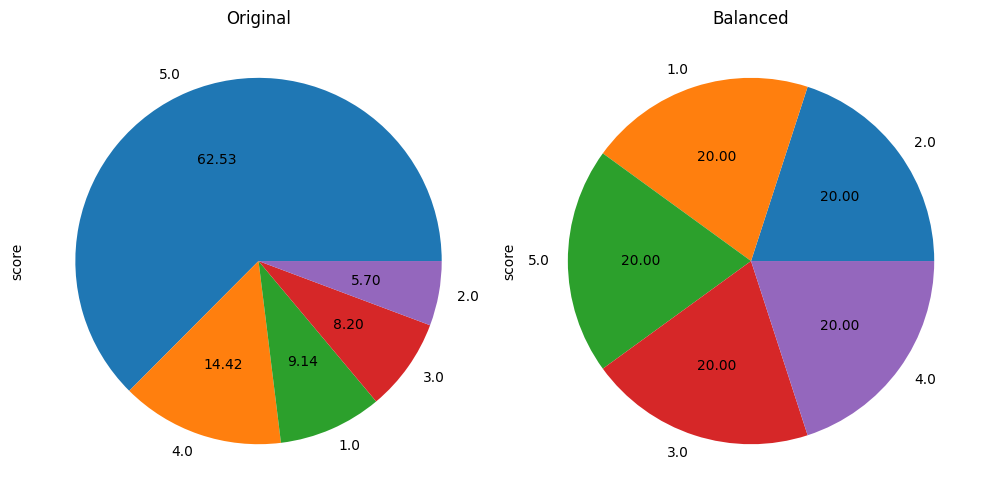

In [ ]:
sampling_strategy = "not majority"
autopct = "%.2f"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
y_train.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Original")

ROS = RandomOverSampler(sampling_strategy=sampling_strategy)
X_train_ros, y_train_ros = ROS.fit_resample(X_train_dtm, y_train)
y_train_ros.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("Balanced")
fig.tight_layout()

In [ ]:
y_train_ros.value_counts()

2.0    16495
1.0    16495
5.0    16495
3.0    16495
4.0    16495
Name: score, dtype: int64

In [ ]:
df.score.value_counts()

5.0    22017
4.0     5071
1.0     3218
3.0     2860
2.0     2006
Name: score, dtype: int64

In [ ]:
def analisys(y_test, y_pred_class):
  print("\n Accuracy: ", accuracy_score(y_test, y_pred_class))
  print("Report: \n",classification_report(y_test, y_pred_class))

  cm = confusion_matrix(y_test, y_pred_class)

  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=[1,2,3,4,5])

  disp.plot()

  plt.show()

### Naive Bayes Classifier



 Accuracy:  0.5834186284544524
Report: 
               precision    recall  f1-score   support

         1.0       0.42      0.58      0.49       806
         2.0       0.21      0.33      0.25       502
         3.0       0.23      0.35      0.28       697
         4.0       0.29      0.34      0.32      1266
         5.0       0.87      0.69      0.77      5522

    accuracy                           0.58      8793
   macro avg       0.41      0.46      0.42      8793
weighted avg       0.66      0.58      0.61      8793



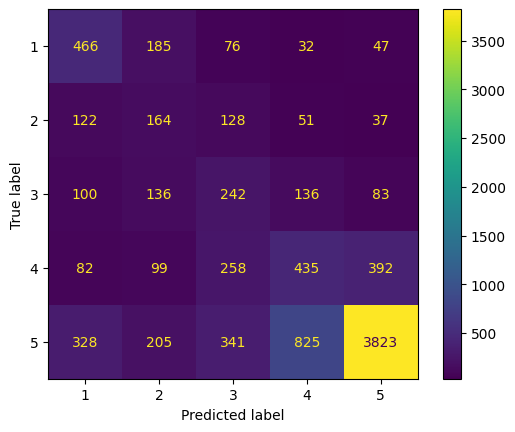

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB() #instantiate a Multinomial Naive Bayes classifier
nb.fit(X_train_ros, y_train_ros)#train the mode
y_pred_class = nb.predict(X_test_dtm)#make class predictions for test data
analisys(y_test, y_pred_class)

### Logistic Regression


In [ ]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(max_iter=10000)
# logreg.fit(X_train_ros, y_train_ros)
# y_pred_class = logreg.predict(X_test_dtm)
# analisys(y_test, y_pred_class)

### Support Vector Machine


In [ ]:
# from sklearn.svm import LinearSVC
# classifier = LinearSVC() 
# classifier.fit(X_train_dtm, y_train) #fit the model with training data
# y_pred_class = classifier.predict(X_test_dtm)
# analisys(y_test, y_pred_class)

## Using Neural Embeddings in Text Classification


### Word Embeddings
We use [GoogleNews-vectors-negative300](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g). This is a large model that can be seen as a dictionary where the keys are words in the
vocabulary and the values are their learned embedding representations. Given a
query word, if the word’s embedding is present in the dictionary, it will return the
same

In [ ]:
data_path= PATH_PROJ + "GoogleNews-vectors-negative300.bin" # from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/view?resourcekey=0-wjGZdNAUop6WykTtMip30g
# !cp $data_path "/content/GoogleNews-vectors-negative300.bin"

In [ ]:
from gensim.models import KeyedVectors

#Load W2V model. This will take some time.
w2v_model = KeyedVectors.load_word2vec_format(data_path, binary=True)
print('done loading Word2Vec')

done loading Word2Vec


How do we use this pre-learned embedding to represent features? A simple approach is just
to average the embeddings for individual words in text.

In [ ]:
# Creating a feature vector by averaging all embeddings for all sentences
def embedding_feats(list_of_lists, w2v_model):
  DIMENSION = 300
  zero_vector = np.zeros(DIMENSION)
  feats = []
  for tokens in list_of_lists:
    feat_for_this = np.zeros(DIMENSION)
    count_for_this = 0
    
    for token in tokens:
      if token in w2v_model:
        feat_for_this += w2v_model[token]
        count_for_this +=1
    
    feats.append(feat_for_this/count_for_this)
    
  return feats

In [ ]:
train_vectors = embedding_feats(X_train, w2v_model)
print(len(train_vectors))
test_vectors = embedding_feats(X_test, w2v_model)
print(len(test_vectors))

26379
8793


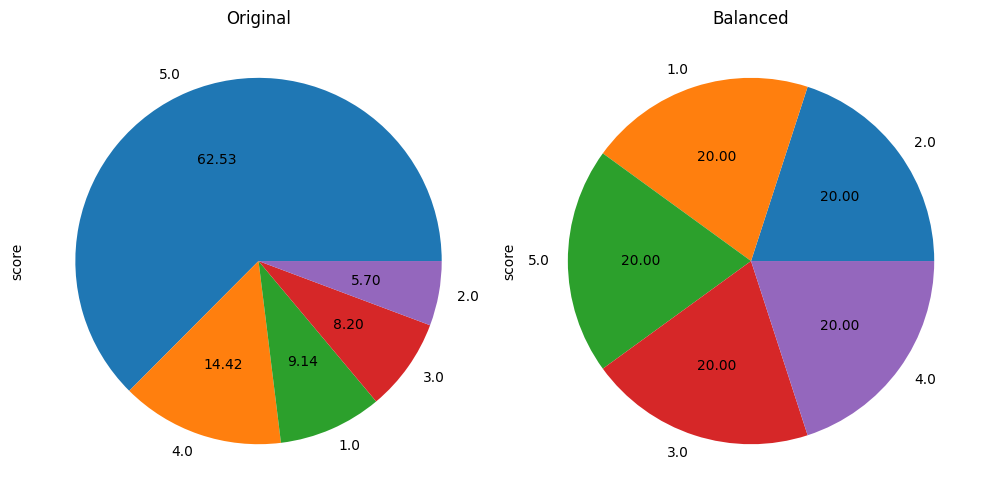

In [ ]:
sampling_strategy = "not majority"
autopct = "%.2f"

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))
y_train.value_counts().plot.pie(autopct=autopct, ax=axs[0])
axs[0].set_title("Original")

ROS = RandomOverSampler(sampling_strategy=sampling_strategy)
X_train_ros, y_train_ros = ROS.fit_resample(train_vectors, y_train)
y_train_ros.value_counts().plot.pie(autopct=autopct, ax=axs[1])
axs[1].set_title("Balanced")
fig.tight_layout()

In [ ]:
np.argwhere(np.isnan(np.array(train_vectors)))

array([[   57,     0],
       [   57,     1],
       [   57,     2],
       ...,
       [25888,   297],
       [25888,   298],
       [25888,   299]])

We treat the resulting
embedding vector as the feature vector that represents the entire text. Once this feature engineering is done, the final step is similar to what we did in the previous section: use these features and train a classifier. 


### Naive Bayes Classifier


In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB() #instantiate a Multinomial Naive Bayes classifier
nb.fit(train_vectors, y_train_ros)#train the mode
y_pred_class = nb.predict(X_test_dtm)#make class predictions for test data
analisys(y_test, y_pred_class)

ValueError: ignored

### Logistic Regression


In [ ]:
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(max_iter=10000)
# logreg.fit(X_train_ros, y_train_ros)
# y_pred_class = logreg.predict(X_test_dtm)
# analisys(y_test, y_pred_class)

### Support Vector Machine


In [ ]:
# from sklearn.svm import LinearSVC
# classifier = LinearSVC() 
# classifier.fit(X_train_dtm, y_train) #fit the model with training data
# y_pred_class = classifier.predict(X_test_dtm)
# analisys(y_test, y_pred_class)